# Run the pyWOMBAT biogeochemical model in 1D water column configuration

In [1]:
import sys
import os
import itertools
import logging
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import scipy as sci
from scipy.stats import qmc
import PyCO2SYS as pyco2
import matplotlib.pyplot as plt
import multiprocessing

# Ensure we are in the correct directory
os.chdir("/home/581/pjb581/py-WOMBAT/lite")
print(os.getcwd())
from main import main  # Import the main function from main.py

# Define output directory and ensure it exists (MAKE SURE A FORWARD SLASH EXISTS AT END)
OUTPUT_DIR = "/g/data/es60/pjb581/py-WOMBAT/output/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("python version =",sys.version[:5])
print("numpy version =", np.__version__)
print("xarray version =", xr.__version__)
print("scipy version =", sci.__version__)
print("PyCO2SYS version =", pyco2.__version__)

print(datetime.now())

"""
NOTE: Need read permissions for groups es60, gb6, qv56
"""

/home/581/pjb581/py-WOMBAT/lite
python version = 3.10.
numpy version = 1.24.4
xarray version = 2023.8.0
scipy version = 1.15.1
PyCO2SYS version = 1.8.3.4
2025-04-26 09:19:47.643402


'\nNOTE: Need read permissions for groups es60, gb6, qv56\n'

In [2]:
!git branch

  master
  pyWOMBAT-on-Gadi
* pyWOMBAT-on-Gadi_microbes


## Define the experimental parameters

In [3]:
year = 2001
days = 30
lons = [270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0]
lats = [10.0, 5.0, 0.0, -5.0, -10., -15.0, -20.0, -25.0, -30.0, -35.0, -40.0, -45.0, -50.0, -55.0, -60.0, -65.0]
atm_co2 = 400.0

info = np.array([[1.0, year, days, lons[0]-360.0, lats[0], atm_co2],
                 [2.0, year, days, lons[1]-360.0, lats[1], atm_co2],
                 [3.0, year, days, lons[2]-360.0, lats[2], atm_co2],
                 [4.0, year, days, lons[3]-360.0, lats[3], atm_co2],
                 [5.0, year, days, lons[4]-360.0, lats[4], atm_co2],
                 [6.0, year, days, lons[5]-360.0, lats[5], atm_co2],
                 [7.0, year, days, lons[6]-360.0, lats[6], atm_co2],
                 [8.0, year, days, lons[7]-360.0, lats[7], atm_co2],
                 [9.0, year, days, lons[8]-360.0, lats[8], atm_co2],
                 [10.0, year, days, lons[9]-360.0, lats[9], atm_co2],
                 [11.0, year, days, lons[10]-360.0, lats[10], atm_co2],
                 [12.0, year, days, lons[11]-360.0, lats[11], atm_co2],
                 [13.0, year, days, lons[12]-360.0, lats[12], atm_co2],
                 [14.0, year, days, lons[13]-360.0, lats[13], atm_co2],
                 [15.0, year, days, lons[14]-360.0, lats[14], atm_co2],
                 [16.0, year, days, lons[15]-360.0, lats[15], atm_co2]])
info

array([[ 1.000e+00,  2.001e+03,  3.000e+01, -9.000e+01,  1.000e+01,
         4.000e+02],
       [ 2.000e+00,  2.001e+03,  3.000e+01, -9.000e+01,  5.000e+00,
         4.000e+02],
       [ 3.000e+00,  2.001e+03,  3.000e+01, -9.000e+01,  0.000e+00,
         4.000e+02],
       [ 4.000e+00,  2.001e+03,  3.000e+01, -9.000e+01, -5.000e+00,
         4.000e+02],
       [ 5.000e+00,  2.001e+03,  3.000e+01, -9.000e+01, -1.000e+01,
         4.000e+02],
       [ 6.000e+00,  2.001e+03,  3.000e+01, -9.000e+01, -1.500e+01,
         4.000e+02],
       [ 7.000e+00,  2.001e+03,  3.000e+01, -9.000e+01, -2.000e+01,
         4.000e+02],
       [ 8.000e+00,  2.001e+03,  3.000e+01, -9.000e+01, -2.500e+01,
         4.000e+02],
       [ 9.000e+00,  2.001e+03,  3.000e+01, -9.000e+01, -3.000e+01,
         4.000e+02],
       [ 1.000e+01,  2.001e+03,  3.000e+01, -9.000e+01, -3.500e+01,
         4.000e+02],
       [ 1.100e+01,  2.001e+03,  3.000e+01, -9.000e+01, -4.000e+01,
         4.000e+02],
       [ 1.200e+01,  

## Save parameter sets in excel

In [4]:
names = ["expnum", "year", "days", "longitude", "latitude", "atmCO2"]

paramsets = pd.DataFrame(info, columns=names)
paramsets

,expnum,year,days,longitude,latitude,atmCO2
0,1.0,2001.0,30.0,-90.0,10.0,400.0
1,2.0,2001.0,30.0,-90.0,5.0,400.0
2,3.0,2001.0,30.0,-90.0,0.0,400.0
3,4.0,2001.0,30.0,-90.0,-5.0,400.0
4,5.0,2001.0,30.0,-90.0,-10.0,400.0
5,6.0,2001.0,30.0,-90.0,-15.0,400.0
6,7.0,2001.0,30.0,-90.0,-20.0,400.0
7,8.0,2001.0,30.0,-90.0,-25.0,400.0
8,9.0,2001.0,30.0,-90.0,-30.0,400.0
9,10.0,2001.0,30.0,-90.0,-35.0,400.0


## Run the experiments

In [5]:
# setup the log file for each experiment
def setup_logging():
    log_file = f"experiment_output_{multiprocessing.current_process().pid}.log"
    logging.basicConfig(filename=log_file, level=logging.INFO, format="%(asctime)s - %(message)s")


# Define function to run one experiment
def run_experiment(exp):

    setup_logging()
    
    expnum, yr, dayl, lon, lat, atm_co2 = exp
    
    logging.info(f"\n🚀 Running Experiment with Params: {exp}")
    logging.info(f"Process {multiprocessing.current_process().pid} started at {datetime.now()}")
    
    # Run the main function with these parameters
    main(expnum, yr, dayl, lon, lat, atm_co2)

    logging.info(f"Process {multiprocessing.current_process().pid} finished at {datetime.now()}")
    logging.info(f"✅ Experiment Complete: {exp}")
    


In [6]:
### Cut out the experiments already run
done = set()
for fn in os.listdir(OUTPUT_DIR):
    if "exp" in fn and fn.endswith(".nc"):
            try:
                # Extract the experiment number
                exp_str = fn.split("exp")[-1].split(".nc")[0]
                expnum = int(exp_str)
                done.add(expnum)
            except ValueError:
                # In case conversion fails, skip this file
                continue

todo = [exp for exp in info if exp[0] not in done]
np.shape(todo)

(16, 6)

In [ ]:
# Run experiments in parallel using multiprocessing
if __name__ == "__main__":
    num_processes = min(min(multiprocessing.cpu_count(), 16), len(todo))  # Use at most the available cores to a max of 16
    print("Running %i parallel experiments"%(num_processes))
    with multiprocessing.Pool(processes=num_processes) as pool:
        pool.map(run_experiment, todo)

    # Check generated output files
    output_files = os.listdir("output")
    print("\nGenerated output files:", output_files)
    

Running 16 parallel experiments


/g/data/es60/pjb581/miniforge3/envs/pyWOMBAT_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/g/data/es60/pjb581/miniforge3/envs/pyWOMBAT_env/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [14]:
data = xr.open_dataset('inputs/woa23_all_o00_01.nc', decode_times=False)
o2 = data['o_an'].squeeze()
data.close()

In [15]:
o2

<xarray.DataArray 'o_an' (depth: 102, lat: 180, lon: 360)>
[6609600 values with dtype=float32]
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 3.894e+03
Attributes:
    standard_name:  moles_of_oxygen_per_unit_mass_in_sea_water
    long_name:      Objectively analyzed mean fields for moles_of_oxygen_per_...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram

In [16]:

from src.parameters import p_Grid, p_Diff, p_BGC

bot = 1300.0
dz = 5.0
Grid = p_Grid(bot, dz)

Grid.zgrid

array([    2.5,    -2.5,    -7.5,   -12.5,   -17.5,   -22.5,   -27.5,
         -32.5,   -37.5,   -42.5,   -47.5,   -52.5,   -57.5,   -62.5,
         -67.5,   -72.5,   -77.5,   -82.5,   -87.5,   -92.5,   -97.5,
        -102.5,  -107.5,  -112.5,  -117.5,  -122.5,  -127.5,  -132.5,
        -137.5,  -142.5,  -147.5,  -152.5,  -157.5,  -162.5,  -167.5,
        -172.5,  -177.5,  -182.5,  -187.5,  -192.5,  -197.5,  -202.5,
        -207.5,  -212.5,  -217.5,  -222.5,  -227.5,  -232.5,  -237.5,
        -242.5,  -247.5,  -252.5,  -257.5,  -262.5,  -267.5,  -272.5,
        -277.5,  -282.5,  -287.5,  -292.5,  -297.5,  -302.5,  -307.5,
        -312.5,  -317.5,  -322.5,  -327.5,  -332.5,  -337.5,  -342.5,
        -347.5,  -352.5,  -357.5,  -362.5,  -367.5,  -372.5,  -377.5,
        -382.5,  -387.5,  -392.5,  -397.5,  -402.5,  -407.5,  -412.5,
        -417.5,  -422.5,  -427.5,  -432.5,  -437.5,  -442.5,  -447.5,
        -452.5,  -457.5,  -462.5,  -467.5,  -472.5,  -477.5,  -482.5,
        -487.5,  -49

In [41]:
lon = 270.0 - 360.0
lat = -10.0
allo2 = o2.sel(lon=lon, lat=lat, method='nearest')
allo2

<xarray.DataArray 'o_an' (depth: 102)>
[102 values with dtype=float32]
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
    lat      float32 -9.5
    lon      float32 -89.5
    time     float32 3.894e+03
Attributes:
    standard_name:  moles_of_oxygen_per_unit_mass_in_sea_water
    long_name:      Objectively analyzed mean fields for moles_of_oxygen_per_...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram

In [42]:
allo2_zgrid = allo2.interp(depth=("depth", -Grid.zgrid))

In [43]:
allo2_zgrid

<xarray.DataArray 'o_an' (depth: 261)>
array([         nan, 213.95289612, 213.64439392, 213.40762329,
       213.51653289, 213.01171876, 211.85691071, 209.5085907 ,
       205.11940002, 198.11908722, 188.1830138 , 175.61261737,
       160.30731964, 142.61474597, 124.31663108, 107.06179798,
        90.33560956,  74.72484589,  61.49398446,  49.95223057,
        38.66211343,  30.91211617,  26.81567132,  22.71922648,
        18.62278163,  14.52633679,  12.18581723,  11.60122345,
        11.01662966,  10.43203587,   9.84744208,   9.71841822,
        10.04496413,  10.37151004,  10.69805595,  11.02460185,
        11.28103876,  11.4673667 ,  11.65369464,  11.84002258,
        12.02635051,  12.10099173,  12.06394625,  12.02690077,
        11.98985529,  11.95280981,  11.93340969,  11.93165493,
        11.92990017,  11.92814541,  11.92639065,  11.79709282,
        11.54025191,  11.28341101,  11.02657011,  10.7697292 ,
        10.510503  ,  10.24889144,   9.98727987,   9.7256683 ,
         9.46405674,   9.22733822,   9.01551266,   8.80368711,
         8.59186155,   8.38003599,   8.15667948,   7.92179207,
         7.68690466,   7.45201724,   7.21712983,   7.04460335,
         6.93443775,   6.82427215,   6.71410655,   6.60394096,
         6.5466466 ,   6.54222345,   6.53780031,   6.53337717,
...
        49.89177089,  50.48562921,  51.07948754,  51.67334586,
        52.26720418,  52.86106251,  53.45492083,  53.98437787,
        54.44943335,  54.91448883,  55.37954431,  55.84459979,
        56.30965527,  56.77471075,  57.23976623,  57.70482171,
        58.16987719,  58.64011707,  59.11554163,  59.5909662 ,
        60.06639076,  60.54181533,  61.01723989,  61.49266446,
        61.96808903,  62.44351359,  62.91893816,  63.3541483 ,
        63.74914381,  64.14413932,  64.53913483,  64.93413034,
        65.32912585,  65.72412136,  66.11911687,  66.51411238,
        66.90910789,  67.26038322,  67.56793861,  67.87549399,
        68.18304938,  68.49060476,  68.79816015,  69.10571553,
        69.41327092,  69.7208263 ,  70.02838169,  70.32608795,
        70.61394501,  70.90180206,  71.18965912,  71.47751617,
        71.76537323,  72.05323029,  72.34108734,  72.6289444 ,
        72.91680145,  73.16724777,  73.38028336,  73.59331895,
        73.80635454,  74.01939012,  74.23242571,  74.4454613 ,
        74.65849688,  74.87153247,  75.08456806,  75.2942646 ,
        75.50062218,  75.70697976,  75.91333733,  76.11969491,
        76.32605248,  76.53241006,  76.73876764,  76.94512521,
        77.15148279])
Coordinates:
    lat      float32 -9.5
    lon      float32 -89.5
    time     float32 3.894e+03
  * depth    (depth) float64 -2.5 2.5 7.5 12.5 ... 1.288e+03 1.292e+03 1.298e+03
Attributes:
    standard_name:  moles_of_oxygen_per_unit_mass_in_sea_water
    long_name:      Objectively analyzed mean fields for moles_of_oxygen_per_...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram

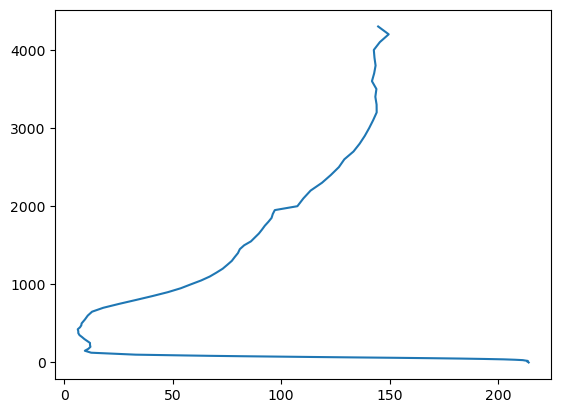

In [44]:
plt.figure()
plt.plot(allo2, allo2.coords['depth'])